# Building a Traffic Sign Classification neural network

In this notebook, we build a small convolutional neural network to classify traffic signs, replicating real-world autonomous driving systems.

In [1]:
%run "utils_imports.ipynb" # import libraries and helper functions

%run "utils_attacks.ipynb"
%run "utils_data.ipynb"
%run "utils_helper.ipynb"
%run "utils_training.ipynb"
%run "siamese_attack_variants.ipynb"

## Preprocessing the dataset

Firstly, we get our data and preprocess it into train and test sets. The logic behind this can be found in get_traffic_dataset in 'data_utils.ipynb'. The dataset contains 43 different classes of traffic sign.

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
# get our dataset- for more detail on the preprocessing, see get_traffic_dataset in data_utils.ipynb
traffic_x_train, traffic_x_test, traffic_y_train, traffic_y_test = get_traffic_dataset()

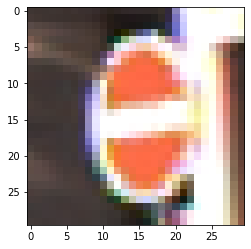

In [4]:
plt.imshow(traffic_x_test[0])
plt.show()

## Building the model

We build a convolutional neural network model based on the LeNet architecture, with dropout layers to avoid overfitting.

In [7]:
def build_model():
    #Building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

## Training

Now, we train our model.

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 10
history = model.fit(traffic_x_train, traffic_y_train, batch_size=32, epochs=epochs, validation_data=(traffic_x_test, traffic_y_test))

Epoch 1/10
981/981 [==============================] - 58s 58ms/step - loss: 1.3155 - accuracy: 0.6275 - val_loss: 0.2025 - val_accuracy: 0.9471
Epoch 2/10
981/981 [==============================] - 60s 61ms/step - loss: 0.2489 - accuracy: 0.9251 - val_loss: 0.0726 - val_accuracy: 0.9799
Epoch 3/10
981/981 [==============================] - 59s 61ms/step - loss: 0.1575 - accuracy: 0.9535 - val_loss: 0.0531 - val_accuracy: 0.9857
Epoch 4/10
981/981 [==============================] - 61s 62ms/step - loss: 0.1210 - accuracy: 0.9636 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 5/10
981/981 [==============================] - 66s 67ms/step - loss: 0.1018 - accuracy: 0.9706 - val_loss: 0.0394 - val_accuracy: 0.9899
Epoch 6/10
981/981 [==============================] - 63s 64ms/step - loss: 0.0856 - accuracy: 0.9733 - val_loss: 0.0345 - val_accuracy: 0.9921
Epoch 7/10
981/981 [==============================] - 60s 61ms/step - loss: 0.0806 - accuracy: 0.9770 - val_loss: 0.0359 - val_accuracy:

In [12]:
model.save("../models/traffic_model/trafficsignNN_normalised.h5")

In [5]:
model = tf.keras.models.load_model("../models/traffic_model/trafficsignNN_normalised.h5")

# Evaluating the model

Here, we observe the training history of the model, and the loss and accuracy against test data. As we can see, the ~98% accuracy on test data shows that this model has been trained successfully.

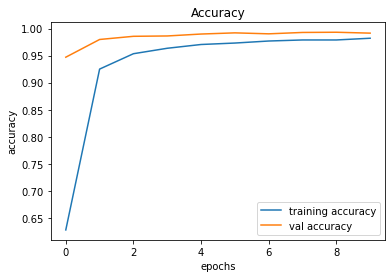

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

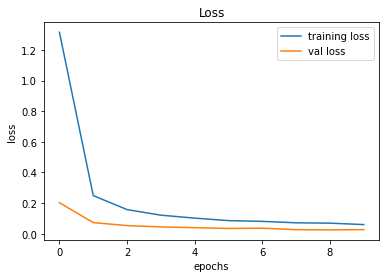

In [14]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

In [7]:
pred = model.predict(traffic_x_test)
model.evaluate(traffic_x_test, traffic_y_test)

27/27 [==============================] - 1s 20ms/step - loss: 0.0344 - accuracy: 0.9895


[0.034369710832834244, 0.989534854888916]